In [1]:
load(file = "/home/adufour/work/rds_storage/omics/stem_cells_from_beyond.Rdata")

In [2]:
library(pathview)
library(Seurat)
library(pathfindR)



##############################################################################
Pathview is an open source software package distributed under GNU General
Public License version 3 (GPLv3). Details of GPLv3 is available at
http://www.gnu.org/licenses/gpl-3.0.html. Particullary, users are required to
formally cite the original Pathview paper (not just mention it) in publications
or products. For details, do citation("pathview") within R.

The pathview downloads and uses KEGG data. Non-academic uses may require a KEGG
license agreement (details at http://www.kegg.jp/kegg/legal.html).
##############################################################################

Attaching SeuratObject

‘SeuratObject’ was built with package ‘Matrix’ 1.6.3 but the current
version is 1.6.4; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict 

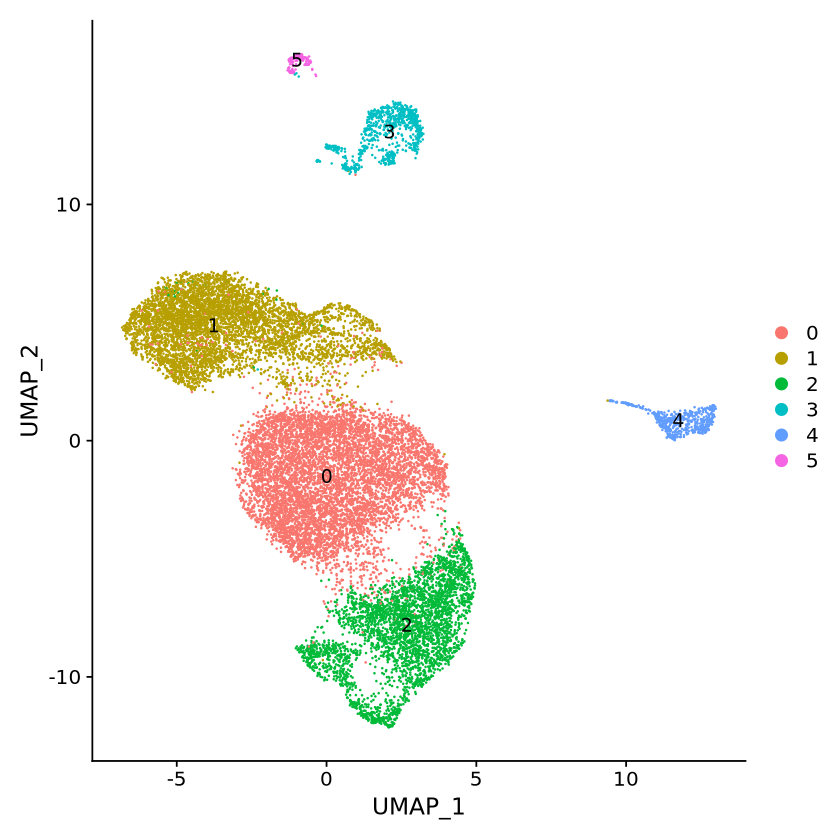

In [3]:
Idents(embryo) <- "seurat_clusters"
DimPlot(embryo, reduction = "umap", label = TRUE)

In [4]:
embryo <- subset(x = embryo, idents = "4", invert = TRUE)

In [6]:
cluster2.markers <- FindMarkers(embryo, ident.1 = "3", ident.2 = c("0", "1", "2"), test.use = "wilcox", logfc.threshold = 0, min.pct = 0)

In [7]:
cluster2.markers$Gene.symbol <- rownames(cluster2.markers)

In [8]:
cluster2.markers <- cluster2.markers[,c("Gene.symbol", "avg_log2FC", "p_val_adj")]

In [9]:
colnames(cluster2.markers) <- c("Gene.symbol", "logFC", "adj.P.Val")

In [10]:
cluster2.markers <- na.omit(cluster2.markers)

In [11]:
foldchange <- cluster2.markers[,2]
names(foldchange) <- cluster2.markers$Gene.symbol

In [12]:
names(foldchange) <- gsub("ENSSSCG00000001393", "POU5F1", gsub("ENSSSCG00000023357", "REST", gsub("ENSSSCG00000007023", "KAT6A", gsub("ENSSSCG00000032299", "LEFTY2", names(foldchange)))))

In [15]:
pv.out <- pathview(gene.data = foldchange, gene.idtype = "SYMBOL", pathway.id = "04350", limit=list(gene=5, cpd=5), species = "ssc", out.suffix = "multiome_stemcells_vs_epiblast")

'select()' returned 1:many mapping between keys and columns



[1] "Note: 20662 of 35670 unique input IDs unmapped."


'select()' returned 1:1 mapping between keys and columns

Info: Working in directory /work/user/adufour/notebook/omics/embryos/time_series

Info: Writing image file ssc04350.multiome_stemcells_vs_epiblast.png

